In [14]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv(r"D:\CMSC\project\Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [17]:
missing_values = df.isnull().sum()
print(missing_values)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112762
Vict Age               0
Vict Sex          107192
Vict Descent      107200
Premis Cd              9
Premis Desc          480
Weapon Used Cd    531448
Weapon Desc       531448
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
LOCATION               0
Cross Street      685361
LAT                    0
LON                    0
dtype: int64


In [18]:
# Columns to be deleted
columns_to_delete = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 
                     'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

# Delete the columns
df.drop(columns=columns_to_delete, axis=1, inplace=True)


df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [19]:
missing_values = df.isnull().sum()
print(missing_values)

DR_NO            0
Date Rptd        0
DATE OCC         0
TIME OCC         0
AREA             0
AREA NAME        0
Rpt Dist No      0
Part 1-2         0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Premis Cd        9
Premis Desc    480
Status           0
Status Desc      0
Crm Cd 1        10
LOCATION         0
LAT              0
LON              0
dtype: int64


In [20]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


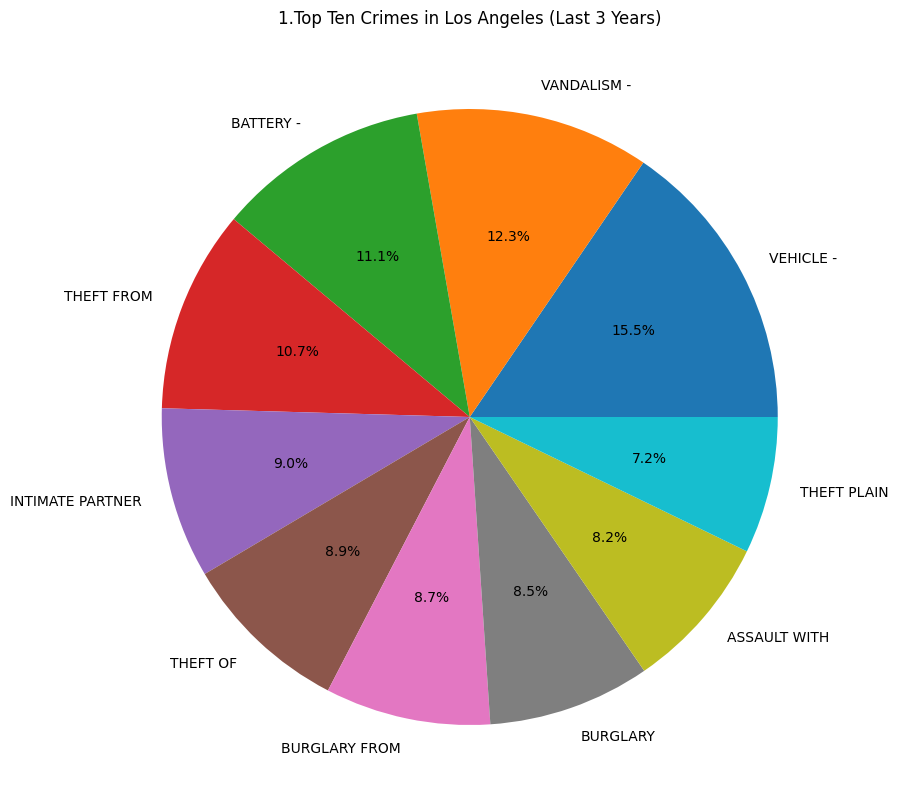

In [28]:
# Shorten the crime type names to their first two words
df['Crm Cd Desc'] = df['Crm Cd Desc'].apply(lambda x: ' '.join(x.split()[:2]))

# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

# Select the top ten crimes based on their frequency
top_ten_crimes = crime_counts.head(10)

# Create the pie chart
plt.figure(figsize=(10, 10))
top_ten_crimes.plot(kind='pie', autopct='%1.1f%%')
plt.title('1.Top Ten Crimes in Los Angeles (Last 3 Years)')
plt.ylabel('')  # Hide the y-label
plt.show()

In [22]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [24]:
import calendar

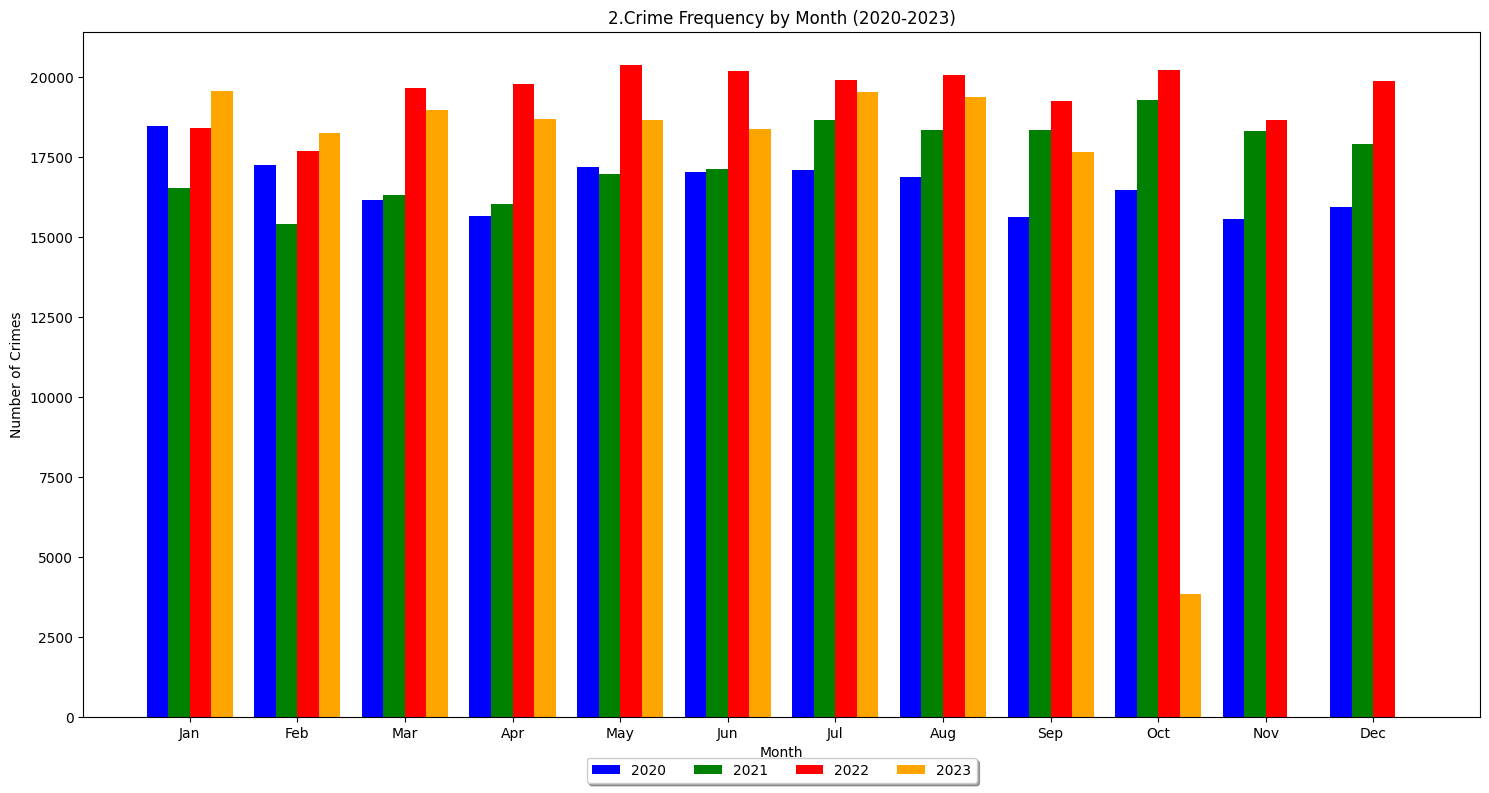

In [29]:
# Convert 'DATE OCC' to datetime and extract year and month
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

# Filter data from 2020 to 2023
df_filtered = df[df['Year'].between(2020, 2023)]

# Group by year and month, then count crimes
crime_counts = df_filtered.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Create the bar chart
plt.figure(figsize=(15, 8))

# Different colors for each year
colors = ['blue', 'green', 'red', 'orange']
bar_width = 0.2  # Width of the bars
months = np.arange(1, 13)  # 12 months

# Plotting each year's bars with an offset based on the bar_width
for i, year in enumerate(range(2020, 2024)):
    # If a year does not have data for all months, we create a zero-filled array
    monthly_data = crime_counts.loc[year] if year in crime_counts.index else np.zeros(len(months))
    plt.bar(months + i*bar_width - 0.3, monthly_data, width=bar_width, color=colors[i], label=str(year))

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('2.Crime Frequency by Month (2020-2023)')
plt.xticks(months, [calendar.month_abbr[i] for i in months])  # Month abbreviations as x-ticks

# Move the legend outside of the plot to the upper center, just below the title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


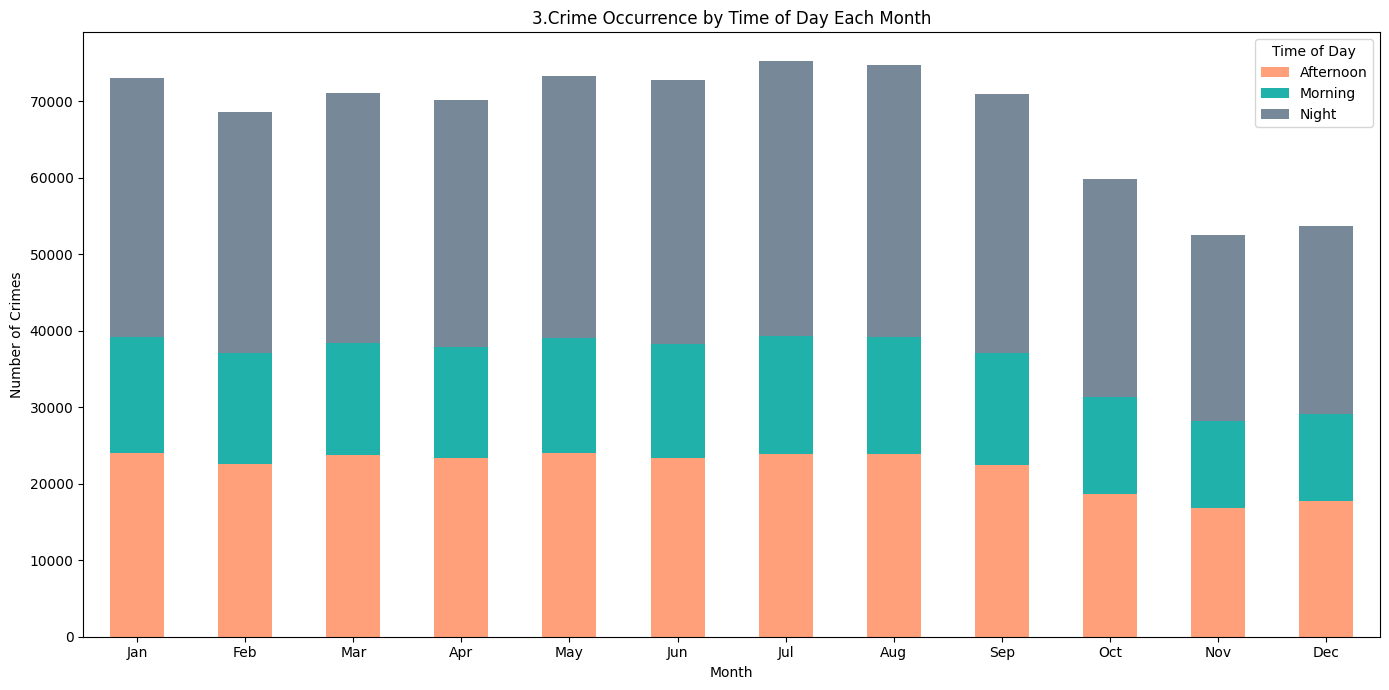

In [30]:
# Function to categorize time of day based on the provided 'TIME OCC' format
def categorize_time(time_occ):
    # Convert to a 4-digit military time format
    time_occ = int(time_occ)
    if time_occ < 100:
        time_occ += 2400
    
    if 600 <= time_occ < 1200:
        return 'Morning'
    elif 1200 <= time_occ < 1800:
        return 'Afternoon'
    else:
        return 'Night'

# Categorize the time of occurrence
df['Time of Day'] = df['TIME OCC'].apply(categorize_time)

# Convert 'DATE OCC' to datetime and extract month
df['Month'] = pd.to_datetime(df['DATE OCC']).dt.month

# Group by month and 'Time of Day', then count occurrences
time_of_day_counts = df.groupby(['Month', 'Time of Day']).size().unstack(fill_value=0)

# Plot the data
time_of_day_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#FFA07A', '#20B2AA', '#778899'])

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('3.Crime Occurrence by Time of Day Each Month')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i+1] for i in range(12)], rotation=0)

# Show the plot
plt.legend(title='Time of Day')
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


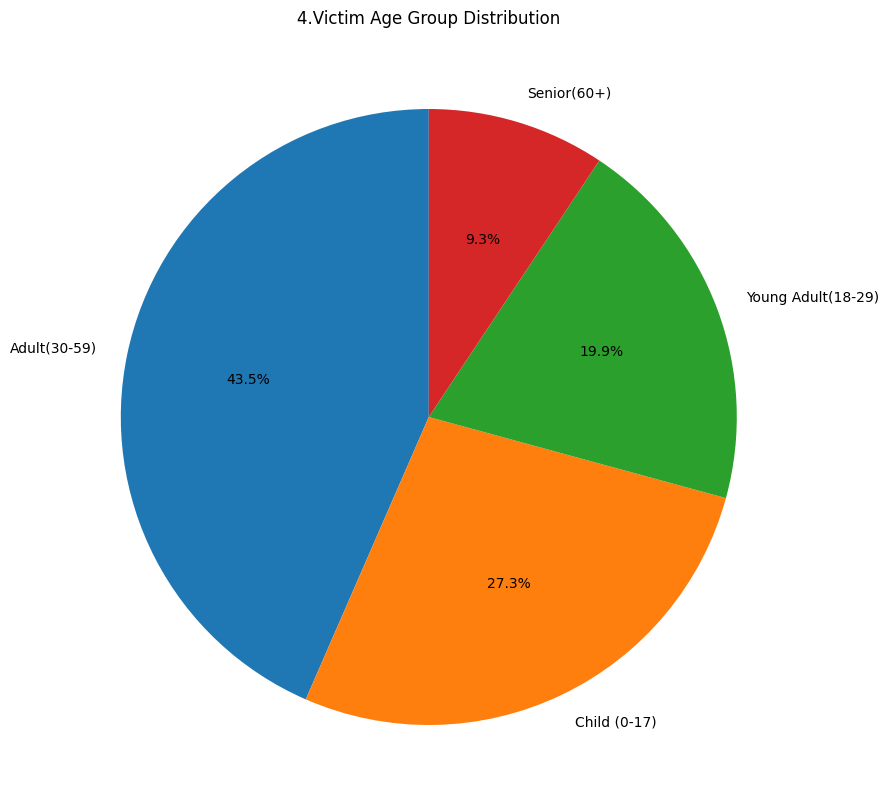

In [31]:
# Define age group boundaries
age_bins = [0, 18, 30, 60, 120]  # 0-17: Child, 18-29: Young Adult, 30-59: Adult, 60+: Senior
age_labels = ['Child (0-17)', 'Young Adult(18-29)', 'Adult(30-59)', 'Senior(60+)']

# Categorize the ages into bins
df['Age Group'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each age group
age_group_counts = df['Age Group'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('4.Victim Age Group Distribution')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

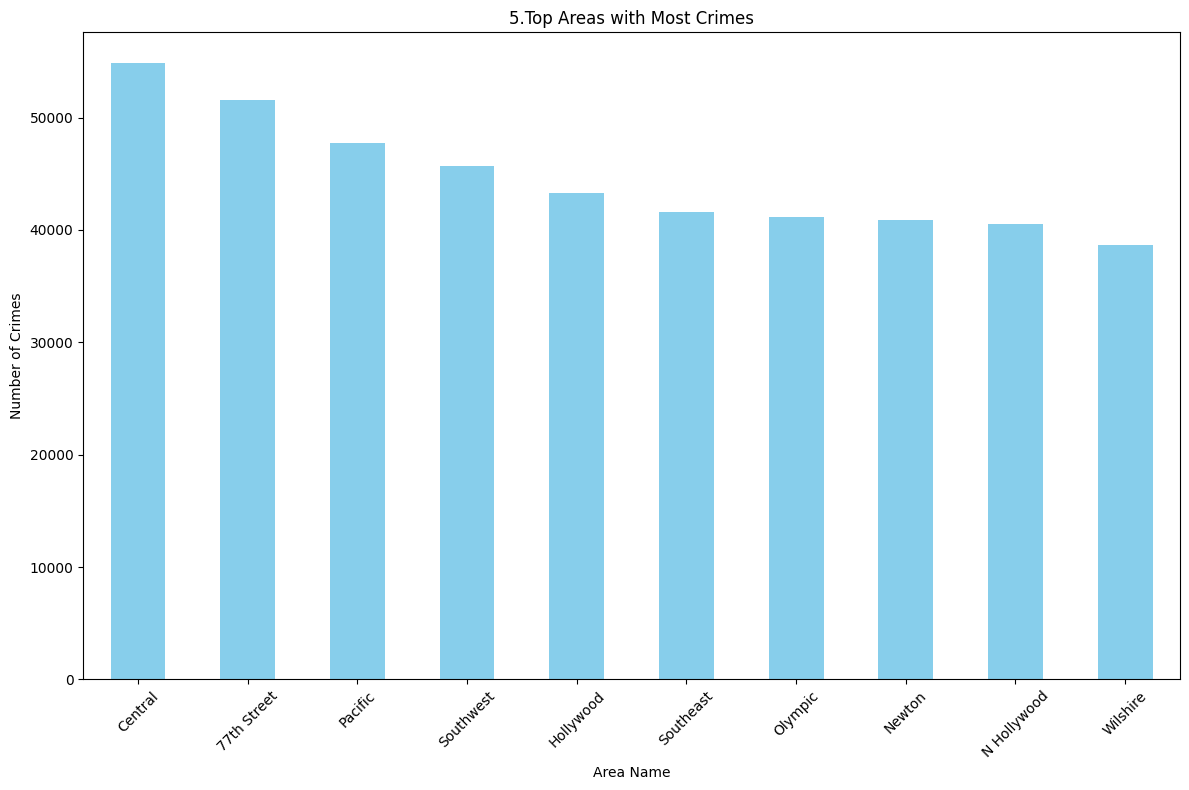

In [37]:
# Count the occurrences of crimes in each area
area_crime_counts = df['AREA NAME'].value_counts()

# Select the top areas with the most crimes
top_areas = area_crime_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
top_areas.plot(kind='bar', color='skyblue')
plt.title('5.Top Areas with Most Crimes')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


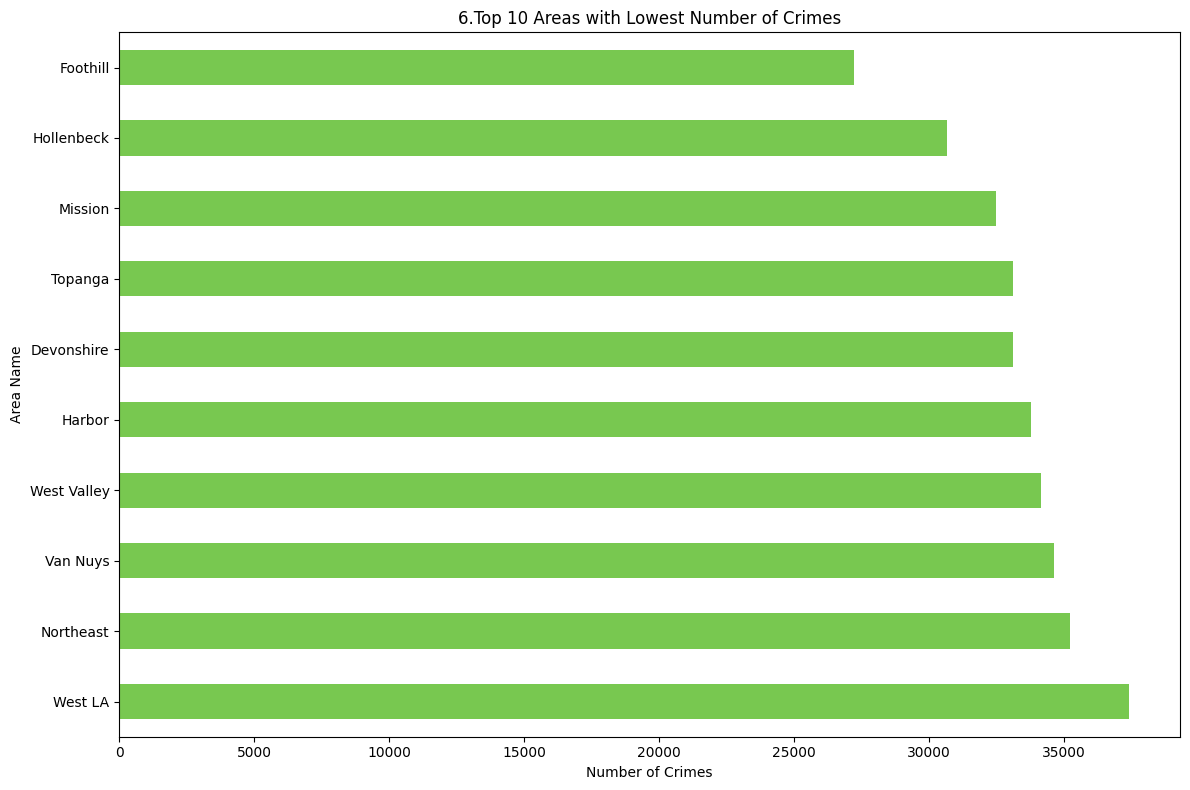

In [36]:
# Count the occurrences of crimes in each area
area_crime_counts = df['AREA NAME'].value_counts()

# Select the top 10 areas with the lowest number of crimes
top_10_lowest_crime_areas = area_crime_counts.nsmallest(10)

# Create the bar chart with a different style and color
plt.figure(figsize=(12, 8))
top_10_lowest_crime_areas.plot(kind='barh', color='#78C850')  # A pleasant green color
plt.title('6.Top 10 Areas with Lowest Number of Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.gca().invert_yaxis()  # To display the lowest value at the bottom of the chart
plt.tight_layout()
plt.show()

In [35]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your data
df = pd.read_csv(r"D:\CMSC\project\Crime_Data_from_2020_to_Present.csv")

# Filter the data for the year 2023
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df_2023 = df[df['DATE OCC'].dt.year == 2023]

# Ensure you're only using rows with non-null latitude and longitude
df_2023 = df_2023.dropna(subset=['LAT', 'LON'])

# Use the given latitude and longitude values as the center of the map
map_center = [33.9828, -118.3235]
crime_map = folium.Map(location=map_center, zoom_start=11)

# Add the heat map layer to the map
heat_data = [[row['LAT'], row['LON']] for index, row in df_2023.iterrows()]
HeatMap(heat_data).add_to(crime_map)

# Create a title for the map using an HTML element
title_html = '''
             <h3 align="center" style="font-size:20px"><b>LA Crime Heatmap 2023</b></h3>
             '''
crime_map.get_root().html.add_child(folium.Element(title_html))

# Save the map to an HTML file
crime_map.save('LA_Crime_Heatmap_2023.html')

# Now, open the HTML file in a web browser
import webbrowser
webbrowser.open('LA_Crime_Heatmap_2023.html', new=2)  # Use the correct path to the file

C:\Users\tangi\AppData\Local\Temp\ipykernel_22008\2993520225.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


True